# Satellite Imagery Analysis in Python

## 1. Open satellite imagery in Python 

Let us import the libraries. 

In [1]:
import rasterio as rio


### Open an image


In [2]:
# Path to the image
path = "D:\CAPSTONE_2_ZINDI\DATA\SHKS_1\small_stacked.tif"

# Open with Rasterio. Let us call it data
rio.open(path)

<open DatasetReader name='D:/CAPSTONE_2_ZINDI/DATA/SHKS_1/small_stacked.tif' mode='r'>

In [3]:
data = rio.open(path)


### META Data

* Coordinate Reference System (CRS)

In [4]:
data.crs

CRS.from_epsg(32633)

* width and height and bands 

In [5]:
print( data.height)
print( data.width)
print(data.count)

831
1092
13


* Image Bands

* The sentinel 2 data has 13 bands. The following table shows the band name and its resolution
![s2-bands](https://user-images.githubusercontent.com/62526508/126557135-6e505b67-5171-4243-8711-4b6dd6836cf0.png)



* Meta data

In [6]:
data.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 1092,
 'height': 831,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 367310.0,
        0.0, -10.0, 6163410.0)}

## 2. Reading Satellite Image bands

In [7]:
data

<open DatasetReader name='D:/CAPSTONE_2_ZINDI/DATA/SHKS_1/small_stacked.tif' mode='r'>

### Read Individual Band

* Read the Red Band / Band 4


In [9]:
red = data.read(4)
red

array([[ 261.,  262.,  263., ..., -999., -999., -999.],
       [ 274.,  265.,  267., ..., -999., -999., -999.],
       [ 280.,  271.,  270., ..., -999., -999., -999.],
       ...,
       [1616., 1249.,  949., ..., 1535., 1597., 1857.],
       [1519., 1691., 1609., ..., 1804., 1835., 1961.],
       [ 890., 1219., 1298., ..., 1973., 1959., 2027.]], dtype=float32)

* Read the Green Band 

In [10]:
green = data.read(3)
green

array([[ 470.,  474.,  488., ..., -999., -999., -999.],
       [ 468.,  483.,  482., ..., -999., -999., -999.],
       [ 473.,  481.,  481., ..., -999., -999., -999.],
       ...,
       [1491., 1242., 1061., ..., 1327., 1408., 1631.],
       [1520., 1600., 1460., ..., 1571., 1554., 1668.],
       [ 970., 1215., 1366., ..., 1631., 1652., 1696.]], dtype=float32)

### Statistical Values of the Image

* Mean Pixel Value

In [11]:
red.mean()

952.64935

In [12]:
green.mean()

1027.1161

* The image size (Width and Height)

We can also print out the shape of the image when we read the band. 

In [13]:
red.shape

(831, 1092)

### Reading All Bands

In [14]:
image_allbands = data.read()
image_allbands

array([[[1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        [1142., 1139., 1139., ..., -999., -999., -999.],
        ...,
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.],
        [1610., 1395., 1395., ..., 1719., 1719., 1719.]],

       [[ 775.,  784.,  782., ..., -999., -999., -999.],
        [ 782.,  784.,  785., ..., -999., -999., -999.],
        [ 784.,  797.,  792., ..., -999., -999., -999.],
        ...,
        [1553., 1274., 1082., ..., 1428., 1447., 1600.],
        [1648., 1734., 1611., ..., 1565., 1571., 1621.],
        [1057., 1253., 1451., ..., 1583., 1606., 1657.]],

       [[ 470.,  474.,  488., ..., -999., -999., -999.],
        [ 468.,  483.,  482., ..., -999., -999., -999.],
        [ 473.,  481.,  481., ..., -999., -999., -999.],
        ...,
        [1491., 1242., 1061., ..., 1327., 1408., 1631.],
        [1520., 1600., 1460., ..., 1571., 155

In [15]:
image_allbands.shape


(13, 831, 1092)

## 3. Visualize Images

In [16]:
#import show 
from rasterio.plot import show

### Simple Plot

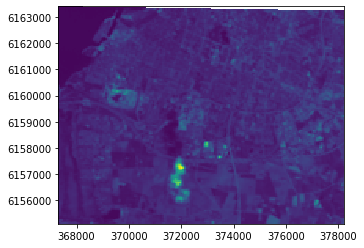

In [16]:
#viz
show(data)

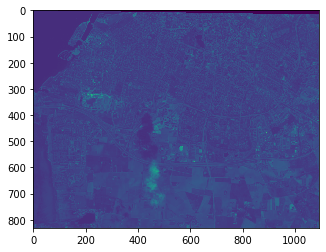

In [17]:
#viz red band 
show(red)

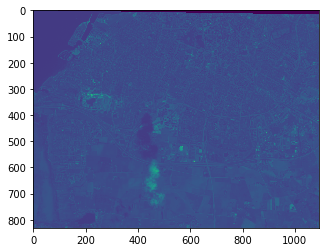

In [18]:
show(green)

### Increasing Plot size

In [17]:
import matplotlib.pyplot as plt 

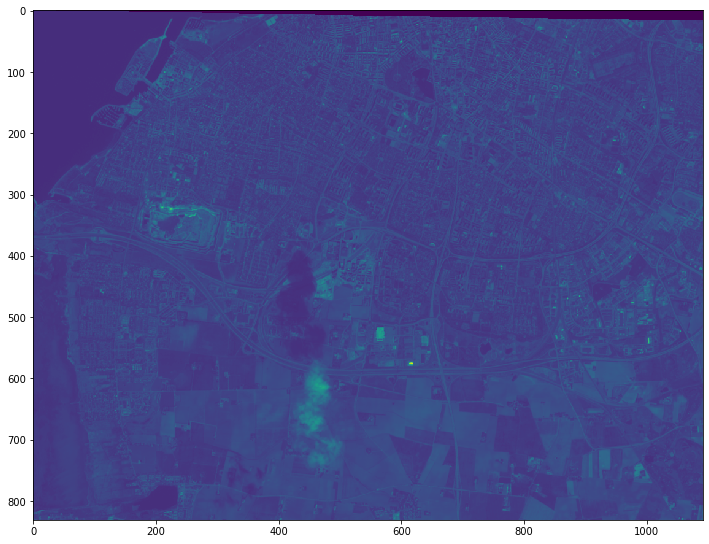

In [17]:
fig,ax = plt.subplots(figsize=(12,10))
show(red, ax=ax)

### Change Colors

* https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

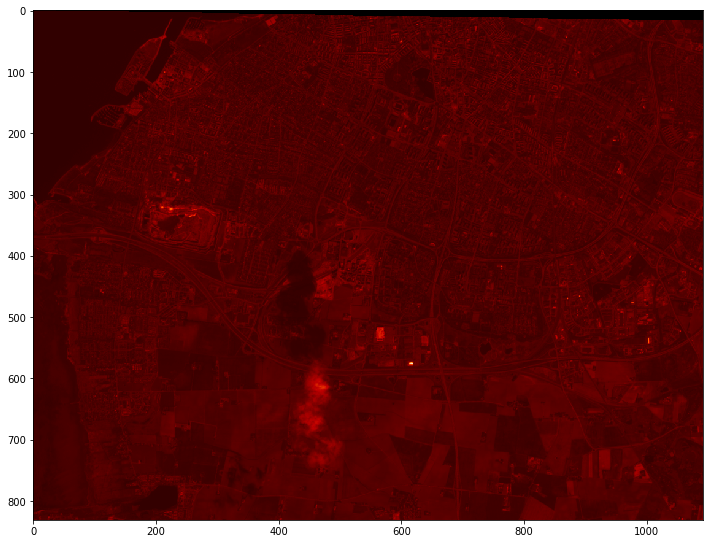

In [18]:
fig,ax = plt.subplots(figsize=(12,10))
show(red,cmap="gist_heat", ax=ax)

## 4. Numpy Array Manipulations

### Create subset Images with Indexes

In [18]:
# Row indexes

red[200:600]

array([[ 262.,  258.,  259., ..., 1299., 1243., 1100.],
       [ 260.,  260.,  254., ..., 1202., 1142., 1048.],
       [ 266.,  259.,  251., ..., 1102.,  984.,  860.],
       ...,
       [ 589.,  641.,  719., ..., 1410., 1063.,  957.],
       [ 587.,  630.,  681., ..., 1381., 1235.,  968.],
       [ 613.,  600.,  618., ..., 1259., 1304., 1025.]], dtype=float32)

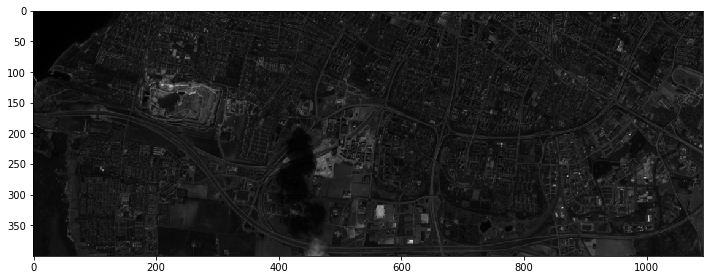

In [20]:
# Visualize row indexing
fig,ax = plt.subplots(figsize=(12,10))
show(red[200:600],cmap="Greys_r", ax=ax)

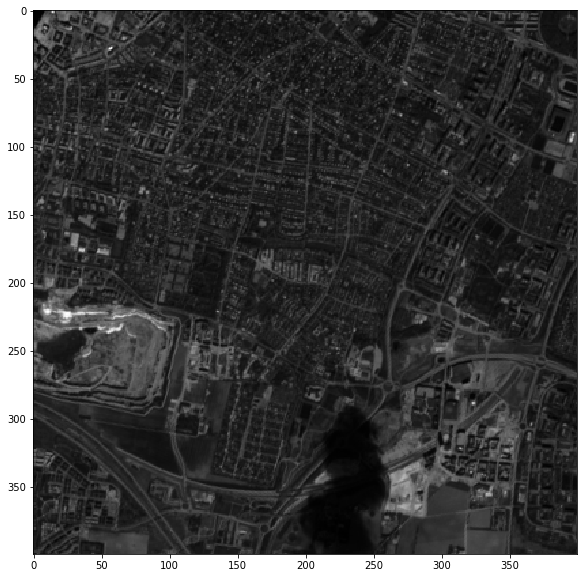

In [21]:
# Visualize row & column indexing
# Visualize row indexing
fig,ax = plt.subplots(figsize=(12,10))
show(red[100:500,200:600],cmap="Greys_r", ax=ax)

## 5. Clipping Images to Boundaries


### Read Vector Data

In [20]:
# Import geopandas 
import geopandas as gpd 
from rasterio.mask import mask 

In [29]:
# Read Vector Data
urban = gpd.read_file("D:/CAPSTONE_2_ZINDI/DATA/SHKS_1/VECTOR/urban.shp")
import shapely; shapely.speedups.disable()
#urban2 = gpd.read_file("D:\CESBIO_TP1_DATA\Data-20210620T153324Z-001\Data\OS_Terrain_Mejjat_190314_190319.shp")


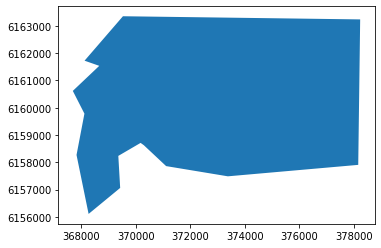

In [31]:
# Plot vector data
urban.plot()

### Mask the Data

In [34]:
# import mask and create cipped image
from rasterio.mask import mask 
clipped_image, image_transform = mask(data, urban.geometry, crop=True)

In [36]:
# Copy the meta
#copy the meta 
image_meta = data.meta.copy()
image_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -999.0,
 'width': 1092,
 'height': 831,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.0, 0.0, 367310.0,
        0.0, -10.0, 6163410.0)}

In [37]:
# Updata the meta
#update  
image_meta.update ({
    'width':clipped_image.shape[1],
    'height':clipped_image.shape[2],
    'transform':image_transform   
    
})

In [38]:
# Check image shape

clipped_image.shape

(13, 725, 1054)

### Read Masked Image and Visualize

In [39]:
# Create an empty Image and write to the clipped image
rio.open("clipped.tif","w",**image_meta).write(clipped_image)

In [40]:
# Read clipped image from the output folder
urban_image = rio.open("clipped.tif")

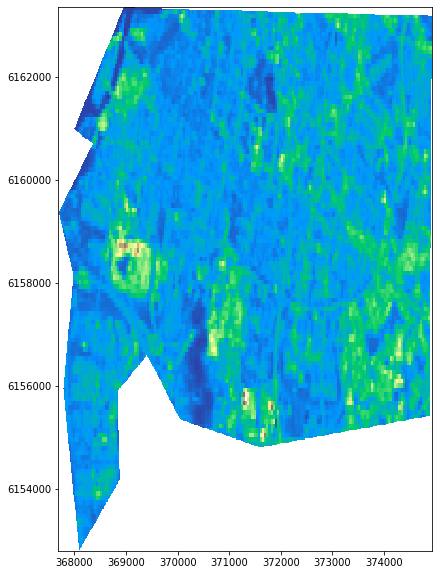

In [99]:
# Visualize the clipped image
fig, ax = plt.subplots(figsize=(12,10))
show(urban_image, cmap="terrain", ax=ax)


## 6. Create Vegetation Index

### Open Original JP2 Sentinel Images

In [59]:
# Open the original image of band 4 and 8
b4=rio.open("D:/CAPSTONE_2_ZINDI/DATA/SHKS_1/JP/T33UUB_20200421T102021_B04.jp2")
b8=rio.open("D:/CAPSTONE_2_ZINDI/DATA/SHKS_1/JP/T33UUB_20200421T102021_B08.jp2")




### Calcualte NDVI

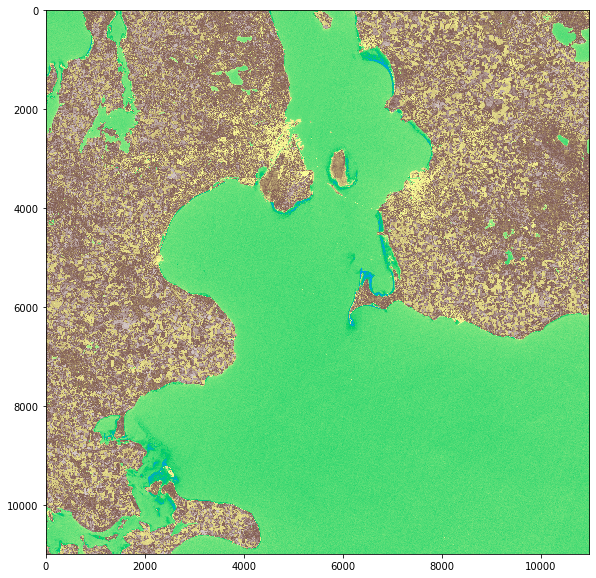

In [97]:
# Calculate ndvi
#read as arrays 

red = b4.read()
nir = b8.read()
#calculate 
ndvi= (nir.astype(float)-red.astype(float))/(nir+red)
ndvi 

#viz : vizualisation is inversed : dark green is low ndvi ! 
fig, ax = plt.subplots(figsize=(12,10))
show(ndvi, cmap="terrain", ax=ax)

### Write NDVI to an Image

In [63]:
# viz NDVI 
ndvi



array([[[-0.3433584 , -0.31414868, -0.30935252, ...,  0.09165278,
          0.37263995,  0.51821324],
        [-0.30243902, -0.31695332, -0.3202934 , ...,  0.206     ,
          0.40412529,  0.53138528],
        [-0.29638554, -0.3101737 , -0.31358025, ...,  0.37397119,
          0.40713963,  0.53918582],
        ...,
        [ 0.08443198,  0.08608161,  0.07961604, ..., -0.36363636,
         -0.35120643, -0.33850129],
        [ 0.08843537,  0.07990996,  0.09131905, ..., -0.31914894,
         -0.32460733, -0.38829787],
        [ 0.0902069 ,  0.0839779 ,  0.08382394, ..., -0.33333333,
         -0.27937337, -0.33512064]]])

In [72]:
#write ndvi to file 
with rio.open("ndvi","w",
             driver="Gtiff",
             width=b4.width,
             height=b4.height,
             count=1,
             crs=b4.crs,
             transform=b4.transform,
             dtype="float64"
             )as im:
    im.write(ndvi)
    
 

## Task 7: Derive Statistics.

In [66]:
# Read Grid Data
grid = gpd.read_file("D:/CAPSTONE_2_ZINDI/DATA/SHKS_1/VECTOR/grid.shp")


In [73]:
# Read NDVI 
ndvi_image = rio.open("D:/CAPSTONE_2_ZINDI/CODE/MICRO_PROJECT_3 S2 COURSERA/ndvi")

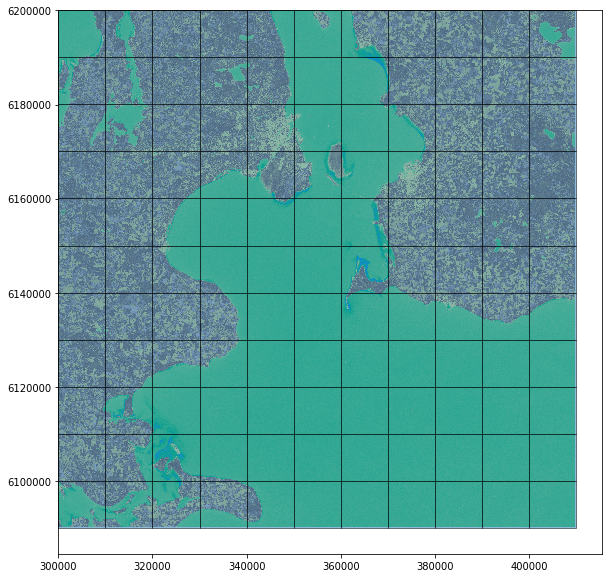

In [98]:
# Plot Both Grid data and NDVI
fig, ax = plt.subplots(figsize=(12,10))
show(ndvi_image, cmap="terrain", ax=ax)
grid.plot(ax=ax, edgecolor="black", alpha=.50)

In [75]:
# Create a funciton to derive stats
def derive_stats(geom, data=ndvi_image):
    masked, _ = mask(dataset=data, shapes=(geom, ),crop=True, all_touched=True,filled=True)
    return mask

In [ ]:
# Create a column for Mean
import numpy as np
grid["mean_ndvi"]=grid.geometry.apply(derive_stats).apply(np.mean)

In [53]:
# Grid head
grid.head()

In [54]:
# Write to file (shapefile or csv)
grid.to_file("../grids_stats.shp")

## 8. Clustering

In [79]:
from sklearn.cluster import KMeans 

In [80]:
band3 = data.read(3)

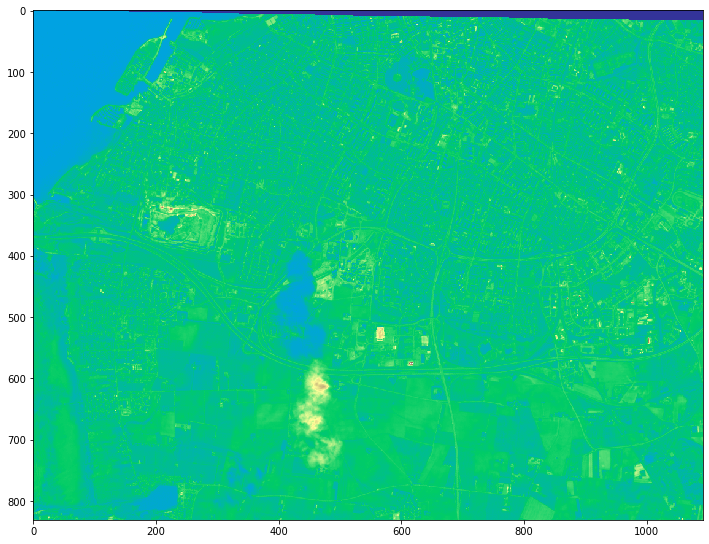

In [96]:
fig, ax = plt.subplots(figsize=(12,10))
show(band3, cmap="terrain", ax=ax)

In [82]:
band3.shape

(831, 1092)

In [86]:
image_to_cluster= band3.reshape((-1,1))


In [89]:
k_mean = KMeans(n_clusters=7)

In [90]:
k_mean.fit(image_to_cluster)
#output : k_mean = KMeans(n_clusters=7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
clusters = k_mean.labels_
clusters

array([1, 1, 1, ..., 2, 2, 2])

In [93]:
cluster_image = clusters.reshape(band3.shape)

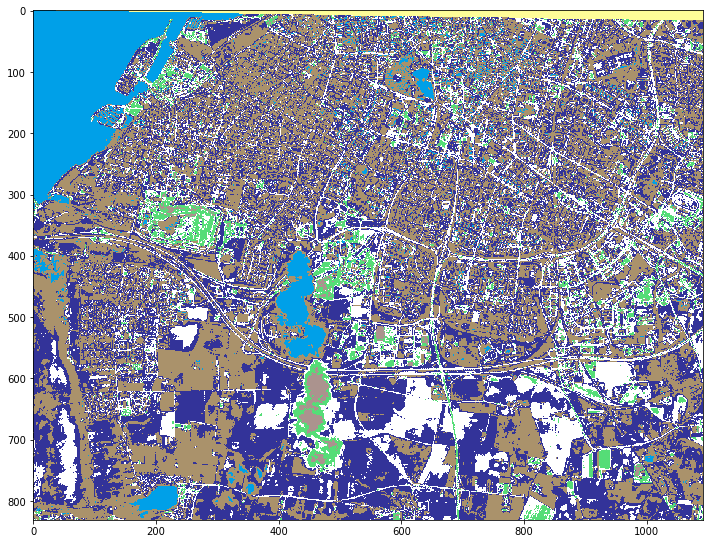

In [95]:
fig, ax = plt.subplots(figsize=(12,10))
show(cluster_image, cmap="terrain", ax=ax)
